**Install Pycaret**

In [7]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
     

Pandas version:  1.3.5
Seaborn version:  0.11.2


**DATA SET**

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/jugal9795/INSE-6220/main/Automobile.csv')
df.head(25)

mpg  cylinders  displacement  horsepower  weight  acceleration  Class
0   18.0          8         307.0         130    3504          12.0      1
1   15.0          8         350.0         165    3693          11.5      1
2   18.0          8         318.0         150    3436          11.0      1
3   16.0          8         304.0         150    3433          12.0      1
4   17.0          8         302.0         140    3449          10.5      1
5   15.0          8         429.0         198    4341          10.0      1
6   14.0          8         454.0         220    4354           9.0      1
7   14.0          8         440.0         215    4312           8.5      1
8   14.0          8         455.0         225    4425          10.0      1
9   15.0          8         390.0         190    3850           8.5      1
10  15.0          8         383.0         170    3563          10.0      1
11  14.0          8         340.0         160    3609           8.0      1
12  15.0          8         400.0         150    3761           9.5      1
13  14.0          8         455.0         225    3086          10.0      1
14  24.0          4         113.0          95    2372          15.0      3
15  22.0          6         198.0          95    2833          15.5      1
16  18.0          6         199.0          97    2774          15.5      1
17  21.0          6         200.0          85    2587          16.0      1
18  27.0          4          97.0          88    2130          14.5      3
19  26.0          4          97.0          46    1835          20.5      2
20  25.0          4         110.0          87    2672          17.5      2
21  24.0          4         107.0          90    2430          14.5      2
22  25.0          4         104.0          95    2375          17.5      2
23  26.0          4         121.0         113    2234          12.5      2
24  21.0          6         199.0          90    2648          15.0      1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   Class         392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


In [13]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

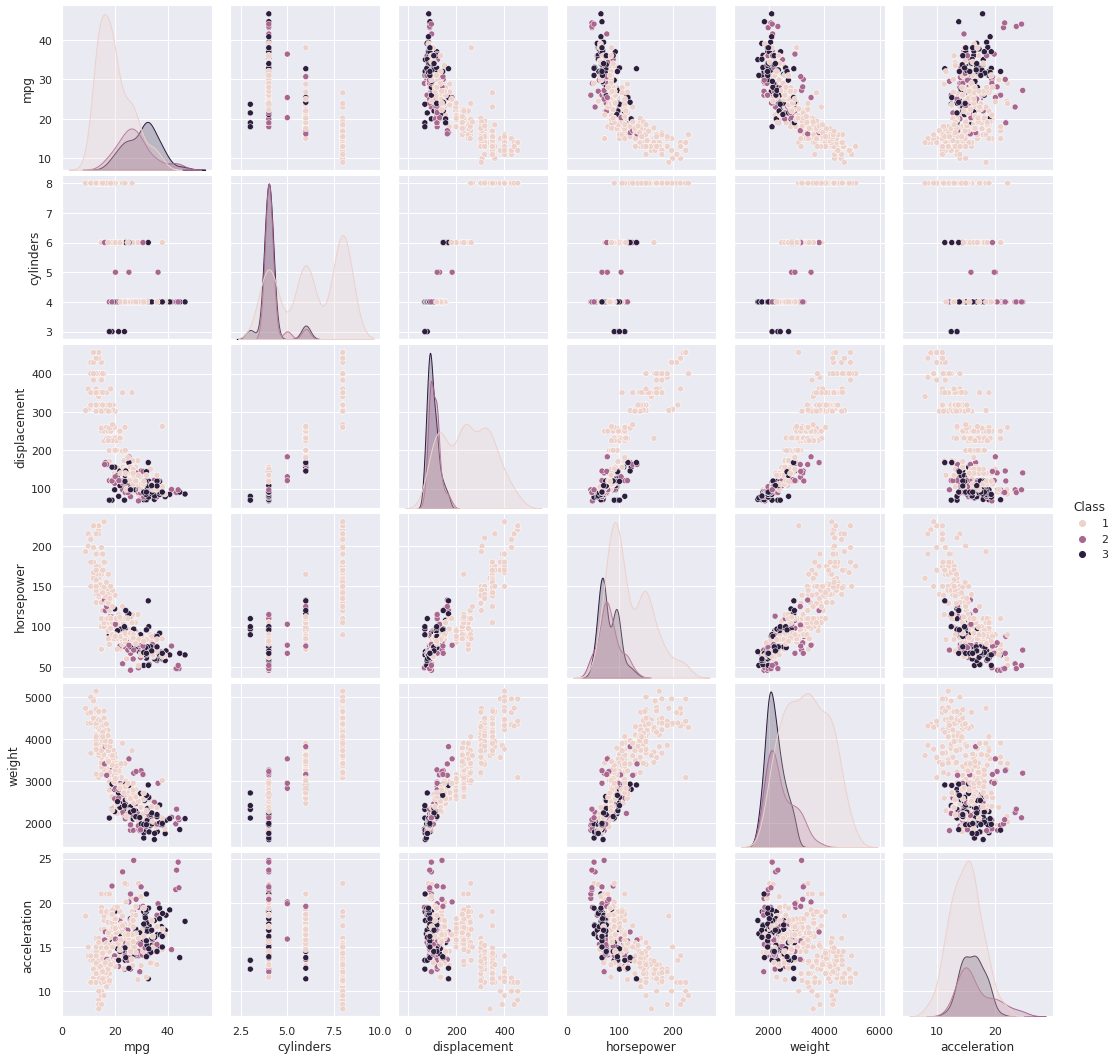

In [14]:
sns.pairplot(df, hue='Class')
plt.show()



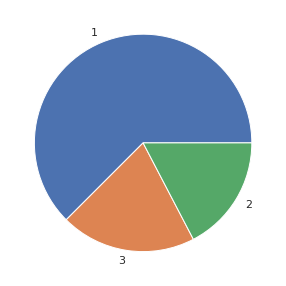

In [15]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()
     

**Data Matrix**

In [16]:
X = df.drop(columns=['Class'])
X.head(10)

mpg  cylinders  displacement  horsepower  weight  acceleration
0  18.0          8         307.0         130    3504          12.0
1  15.0          8         350.0         165    3693          11.5
2  18.0          8         318.0         150    3436          11.0
3  16.0          8         304.0         150    3433          12.0
4  17.0          8         302.0         140    3449          10.5
5  15.0          8         429.0         198    4341          10.0
6  14.0          8         454.0         220    4354           9.0
7  14.0          8         440.0         215    4312           8.5
8  14.0          8         455.0         225    4425          10.0
9  15.0          8         390.0         190    3850           8.5

In [17]:
X.describe().transpose()

count         mean         std     min       25%      50%  \
mpg           392.0    23.445918    7.805007     9.0    17.000    22.75   
cylinders     392.0     5.471939    1.705783     3.0     4.000     4.00   
displacement  392.0   194.411990  104.644004    68.0   105.000   151.00   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.50   
weight        392.0  2977.584184  849.402560  1613.0  2225.250  2803.50   
acceleration  392.0    15.541327    2.758864     8.0    13.775    15.50   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   275.750   455.0  
horsepower     126.000   230.0  
weight        3614.750  5140.0  
acceleration    17.025    24.8

**Standardize the Data**

In [18]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mpg  cylinders  displacement  horsepower    weight  acceleration
0 -0.698638   1.483947      1.077290    0.664133  0.620540     -1.285258
1 -1.083498   1.483947      1.488732    1.574594  0.843334     -1.466724
2 -0.698638   1.483947      1.182542    1.184397  0.540382     -1.648189
3 -0.955212   1.483947      1.048584    1.184397  0.536845     -1.285258
4 -0.826925   1.483947      1.029447    0.924265  0.555706     -1.829655
5 -1.083498   1.483947      2.244637    2.433030  1.607198     -2.011120
6 -1.211785   1.483947      2.483848    3.005320  1.622523     -2.374052
7 -1.211785   1.483947      2.349890    2.875254  1.573013     -2.555517
8 -1.211785   1.483947      2.493416    3.135386  1.706218     -2.011120
9 -1.083498   1.483947      1.871469    2.224924  1.028406     -2.555517

In [19]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
mpg           392.0  1.450087e-16  1.001278 -1.853218 -0.826925 -0.089277   
cylinders     392.0 -1.087565e-16  1.001278 -1.451004 -0.864014 -0.864014   
displacement  392.0 -7.250436e-17  1.001278 -1.209563 -0.855532 -0.415384   
horsepower    392.0 -1.812609e-16  1.001278 -1.520975 -0.766593 -0.285349   
weight        392.0 -1.812609e-17  1.001278 -1.608575 -0.886854 -0.205211   
acceleration  392.0  4.350262e-16  1.001278 -2.736983 -0.641055 -0.014999   

                   75%       max  
mpg           0.712514  2.970359  
cylinders     1.483947  1.483947  
displacement  0.778276  2.493416  
horsepower    0.560080  3.265452  
weight        0.751093  2.549061  
acceleration  0.538471  3.360262

**Observations and variables**

In [20]:

observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

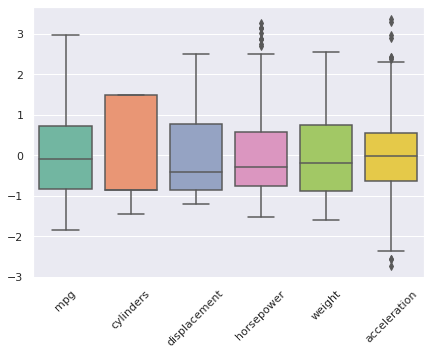

In [21]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

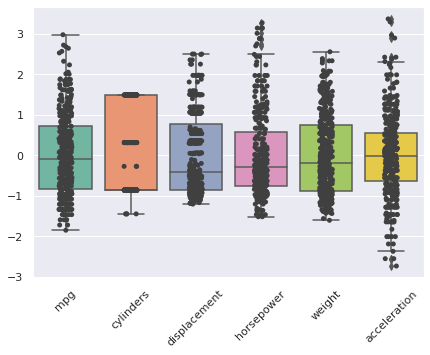

In [22]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

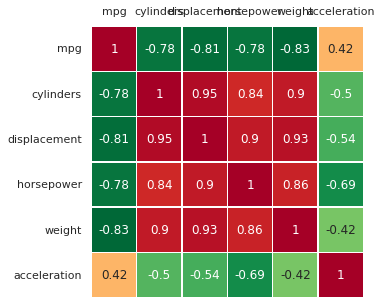

In [23]:

ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')
     

**Principal Component Analysis (PCA)**

Text(0, 0.5, '')

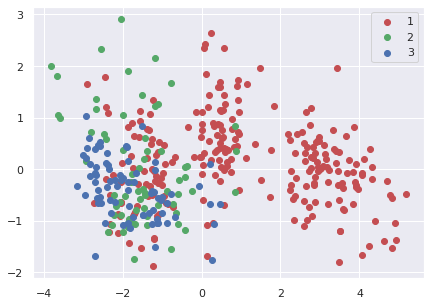

In [24]:
pca =PCA()
Z = pca.fit_transform(X)


idx_1 = np.where(y == 1)
idx_2 = np.where(y == 2)
idx_3 = np.where(y == 3)


plt.figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label=1)
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label=2)
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label=3)

plt.legend()
plt.xlabel('')
plt.ylabel('')

**Eigenvectors**

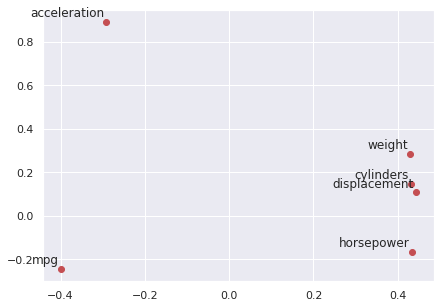

In [25]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

invalid value encountered in sqrt


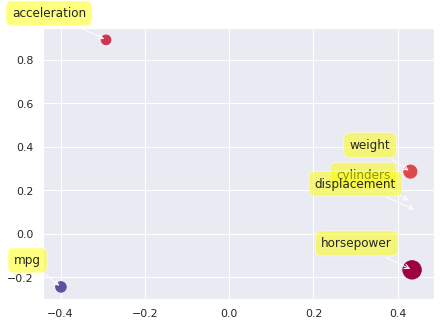

In [26]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

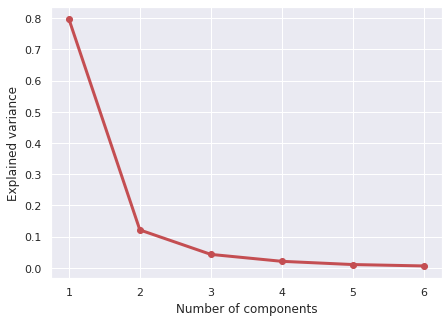

In [27]:

Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

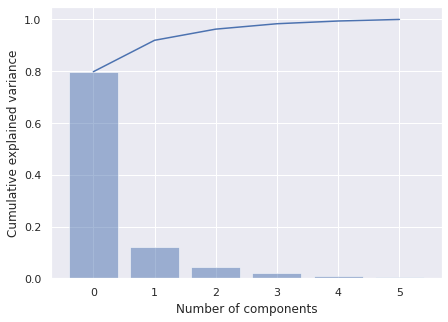

In [28]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

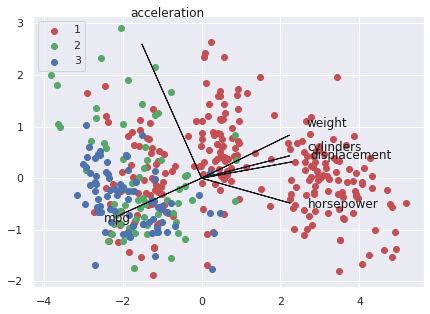

In [29]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='3')

plt.legend(loc='upper left')
     

**Using PCA Library**

In [30]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [32]:
out['PC']

PC1       PC2       PC3
0    2.325970 -0.572082  0.289172
1    3.206057 -0.682741  0.114704
2    2.669984 -0.994013  0.287667
3    2.605465 -0.622770  0.063324
4    2.599901 -1.093593  0.111548
..        ...       ...       ...
387 -1.094780 -0.260687 -0.148668
388 -3.819500  2.000836  1.781485
389 -1.221672 -1.877102  0.171408
390 -1.711394  0.633665 -0.020916
391 -1.871901  0.816649  0.347573

[392 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [392] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [392] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb28103d9d0>)

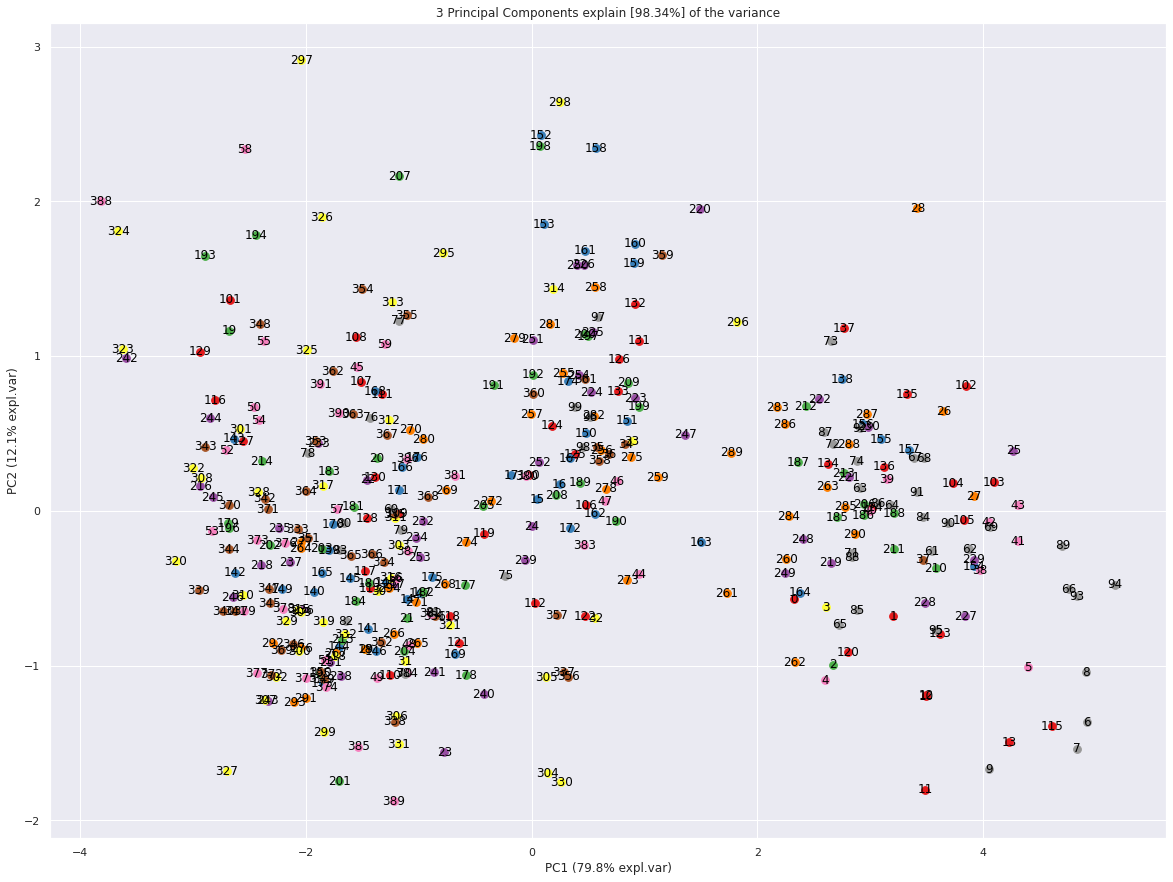

In [33]:

model.scatter(label=True, legend=False)

In [34]:
A = out['loadings'].T

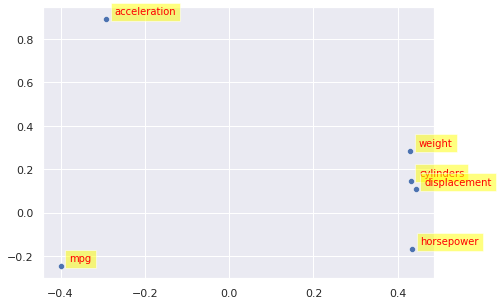

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
     

Varince Ratio

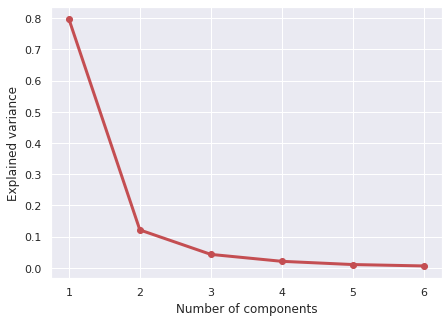

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

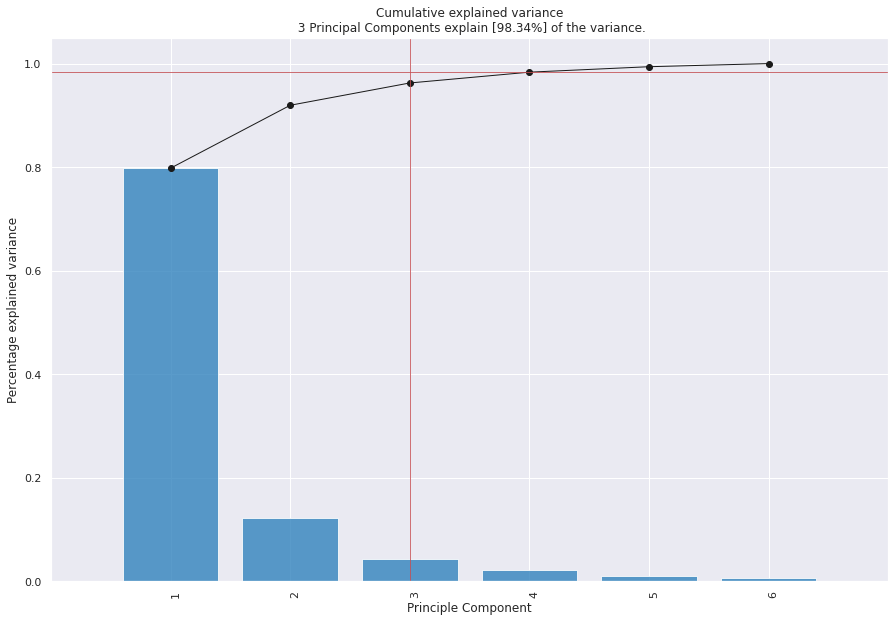

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

**3D Biplot**

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [392] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [392] unique colors! Available unique colors: [9].


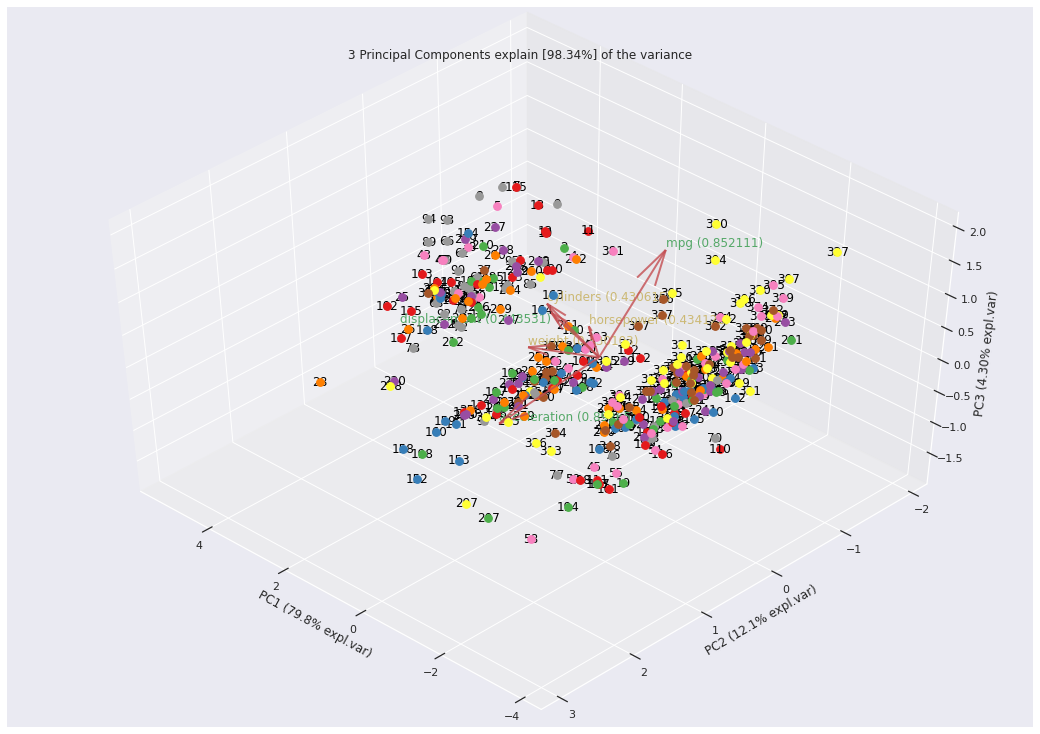

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fb2836c7d60>)

In [38]:
model.biplot3d(legend=False)

**Classification**
Using PyCaret 

In [39]:
from pycaret.utils import enable_colab 
enable_colab()
     

Colab mode enabled.


In [40]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (353, 7)
Unseen Data For Predictions: (39, 7)


**Setting up the Environment in PyCaret**

In [41]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (353, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (247, 10)
12                    Transformed Test Set         (106, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8ff4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [42]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.8095  0.9417  0.7268  0.8261   
et                 Extra Trees Classifier    0.7930  0.9420  0.7072  0.7985   
rf               Random Forest Classifier    0.7852  0.9318  0.7001  0.7897   
lightgbm  Light Gradient Boosting Machine    0.7850  0.9353  0.6833  0.7985   
dt               Decision Tree Classifier    0.7690  0.8082  0.6808  0.7739   
lr                    Logistic Regression    0.7600  0.9095  0.6642  0.7525   
ridge                    Ridge Classifier    0.7442  0.0000  0.6496  0.7615   
ada                  Ada Boost Classifier    0.7360  0.8932  0.6469  0.7497   
lda          Linear Discriminant Analysis    0.7275  0.8898  0.6631  0.7749   
nb                            Naive Bayes    0.6753  0.8628  0.6326  0.7544   
knn                K Neighbors Classifier    0.6433  0.8190  0.4762  0.6073   
qda       Quadratic Discriminant Analysis    0.6115  0.0000  0.3333  0.3741   
dummy                    Dummy Classifier    0.6115  0.5000  0.3333  0.3741   
svm                   SVM - Linear Kernel    0.6047  0.0000  0.4890  0.5470   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.8023  0.6516  0.6616     0.260  
et        0.7827  0.6213  0.6306     0.173  
rf        0.7752  0.6053  0.6165     0.220  
lightgbm  0.7765  0.6059  0.6192     0.135  
dt        0.7620  0.5807  0.5898     0.013  
lr        0.7514  0.5640  0.5714     0.596  
ridge     0.7441  0.5362  0.5441     0.014  
ada       0.7310  0.5362  0.5477     0.092  
lda       0.7410  0.5383  0.5474     0.015  
nb        0.6892  0.4716  0.4906     0.015  
knn       0.6170  0.3132  0.3301     0.020  
qda       0.4642  0.0000  0.0000     0.017  
dummy     0.4642  0.0000  0.0000     0.013  
svm       0.5345  0.2817  0.3188     0.016

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [43]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Create a Model**

In [44]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8400  0.9633  0.7792  0.8400  0.8280  0.6970  0.7055
1       0.8400  0.9740  0.7333  0.8627  0.8222  0.6970  0.7146
2       0.7200  0.9340  0.6222  0.7371  0.7270  0.5139  0.5155
3       0.8400  0.9600  0.7778  0.8441  0.8361  0.6970  0.7051
4       0.7200  0.9040  0.6667  0.7476  0.7196  0.5139  0.5241
5       0.8800  0.9460  0.8444  0.9029  0.8767  0.7857  0.7949
6       0.8800  0.9660  0.8444  0.9250  0.8832  0.7917  0.8074
7       0.7917  0.9148  0.7056  0.7738  0.7708  0.6104  0.6185
8       0.7917  0.9548  0.6333  0.7734  0.7808  0.6000  0.6024
9       0.7917  0.9002  0.6611  0.8542  0.7782  0.6091  0.6280
Mean    0.8095  0.9417  0.7268  0.8261  0.8023  0.6516  0.6616
SD      0.0545  0.0256  0.0782  0.0616  0.0537  0.0937  0.0961

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [45]:
#trained model object is stored in the variable 'gbc'. 
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Tune the Best Model**

In [46]:
tuned_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6800  0.9252  0.5417  0.6400  0.6560  0.3939  0.3988
1       0.8400  0.9760  0.7333  0.8723  0.7958  0.6970  0.7270
2       0.8400  0.9120  0.8222  0.8743  0.8505  0.7297  0.7384
3       0.8800  0.9520  0.8889  0.8838  0.8797  0.7917  0.7941
4       0.6000  0.8860  0.5111  0.6131  0.5975  0.3056  0.3116
5       0.8400  0.9860  0.8222  0.8750  0.8443  0.7297  0.7443
6       0.8800  0.9540  0.8444  0.8933  0.8832  0.7857  0.7880
7       0.7500  0.9180  0.5944  0.7274  0.7371  0.5184  0.5206
8       0.8750  0.9829  0.7833  0.8744  0.8677  0.7509  0.7614
9       0.7500  0.8583  0.6111  0.7413  0.7431  0.5184  0.5206
Mean    0.7935  0.9350  0.7153  0.7995  0.7855  0.6221  0.6305
SD      0.0907  0.0405  0.1311  0.1034  0.0945  0.1657  0.1680

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [47]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

**Evaluate the Best Model**

In [48]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:

!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6800  0.8445  0.4625  0.6367  0.6549  0.3443  0.3490
1       0.6400  0.8540  0.4444  0.5200  0.5689  0.2500  0.2780
2       0.6800  0.7790  0.5556  0.6533  0.6499  0.3750  0.3889
3       0.7200  0.8900  0.5333  0.5786  0.6333  0.3966  0.4743
4       0.4400  0.6510  0.3333  0.4821  0.4584  0.0541  0.0546
5       0.7600  0.8480  0.6000  0.7404  0.7294  0.5161  0.5453
6       0.6800  0.8630  0.5556  0.6675  0.6721  0.4118  0.4132
7       0.5417  0.7783  0.3944  0.6104  0.5707  0.1976  0.2020
8       0.7083  0.8946  0.4667  0.6348  0.6693  0.4167  0.4243
9       0.5833  0.7874  0.4167  0.5488  0.5627  0.1696  0.1719
Mean    0.6433  0.8190  0.4762  0.6073  0.6170  0.3132  0.3301
SD      0.0911  0.0692  0.0794  0.0725  0.0733  0.1336  0.1438

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [51]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6400  0.7874  0.4417  0.6011  0.6172  0.2623  0.2659
1       0.6400  0.7830  0.4444  0.5333  0.5667  0.2241  0.2634
2       0.6000  0.8070  0.4222  0.5000  0.5455  0.2188  0.2303
3       0.8000  0.8310  0.7111  0.8000  0.7869  0.6094  0.6274
4       0.5600  0.6670  0.4444  0.5425  0.5503  0.1912  0.1918
5       0.6400  0.7900  0.4444  0.6008  0.6150  0.3182  0.3230
6       0.8000  0.7770  0.6667  0.8070  0.7794  0.5968  0.6305
7       0.5833  0.7803  0.3111  0.4861  0.5303  0.1398  0.1448
8       0.6667  0.8356  0.4444  0.5903  0.6229  0.3094  0.3207
9       0.7500  0.8039  0.7333  0.7500  0.7375  0.5385  0.5455
Mean    0.6680  0.7862  0.5064  0.6211  0.6352  0.3408  0.3543
SD      0.0821  0.0442  0.1356  0.1148  0.0928  0.1660  0.1707

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [52]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:

lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9224  0.7583  0.8314  0.8026  0.6459  0.6599
1       0.9200  0.9920  0.8667  0.9225  0.9184  0.8529  0.8559
2       0.7600  0.9440  0.6444  0.7800  0.7684  0.5833  0.5851
3       0.7600  0.9360  0.6444  0.7250  0.7374  0.5588  0.5642
4       0.7200  0.8800  0.7111  0.7643  0.7313  0.5395  0.5506
5       0.8400  0.9180  0.8222  0.8438  0.8397  0.7222  0.7245
6       0.8000  0.9160  0.7111  0.8100  0.8024  0.6429  0.6447
7       0.6250  0.8292  0.4833  0.6468  0.6347  0.3250  0.3261
8       0.7500  0.9296  0.5778  0.6338  0.6858  0.4965  0.5228
9       0.6250  0.8281  0.4222  0.5673  0.5936  0.2727  0.2800
Mean    0.7600  0.9095  0.6642  0.7525  0.7514  0.5640  0.5714
SD      0.0856  0.0483  0.1337  0.1039  0.0920  0.1640  0.1630

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [54]:

tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9263  0.7583  0.8314  0.8026  0.6459  0.6599
1       0.9200  0.9900  0.8667  0.9225  0.9184  0.8529  0.8559
2       0.7600  0.9400  0.6444  0.7800  0.7684  0.5833  0.5851
3       0.6800  0.9320  0.5556  0.6700  0.6735  0.4286  0.4298
4       0.7600  0.8780  0.7778  0.7976  0.7677  0.6053  0.6178
5       0.8000  0.9180  0.7556  0.8171  0.8070  0.6528  0.6548
6       0.8000  0.9160  0.7111  0.8100  0.8024  0.6429  0.6447
7       0.6250  0.8356  0.4833  0.6468  0.6347  0.3250  0.3261
8       0.7500  0.9254  0.5778  0.6338  0.6858  0.4965  0.5228
9       0.6250  0.8322  0.4222  0.5673  0.5936  0.2727  0.2800
Mean    0.7520  0.9093  0.6553  0.7477  0.7454  0.5506  0.5577
SD      0.0853  0.0458  0.1354  0.1056  0.0924  0.1641  0.1640

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:

rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8400  0.9496  0.7792  0.8648  0.8357  0.7076  0.7225
1       0.8000  0.9710  0.6667  0.8237  0.7770  0.5968  0.6331
2       0.7600  0.9080  0.6889  0.7705  0.7634  0.5833  0.5851
3       0.8000  0.9410  0.7556  0.7875  0.7850  0.6324  0.6385
4       0.6400  0.8760  0.5778  0.6577  0.6389  0.3919  0.3997
5       0.8000  0.9700  0.7556  0.8683  0.7951  0.6528  0.6773
6       0.9200  0.9560  0.9111  0.9267  0.9211  0.8611  0.8638
7       0.7083  0.8929  0.5111  0.6189  0.6605  0.4146  0.4275
8       0.8333  0.9606  0.7000  0.8220  0.8251  0.6789  0.6818
9       0.7500  0.8927  0.6556  0.7569  0.7505  0.5340  0.5357
Mean    0.7852  0.9318  0.7001  0.7897  0.7752  0.6053  0.6165
SD      0.0728  0.0340  0.1053  0.0899  0.0777  0.1311  0.1309

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [57]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7600  0.9406  0.6917  0.7867  0.7540  0.5763  0.5970
1       0.8400  0.9640  0.7333  0.9111  0.8095  0.7143  0.7494
2       0.7600  0.9100  0.7333  0.8143  0.7758  0.6053  0.6178
3       0.8000  0.9620  0.7556  0.8343  0.8105  0.6622  0.6700
4       0.6400  0.8420  0.6222  0.6966  0.6444  0.4231  0.4421
5       0.8000  0.9020  0.7556  0.8155  0.7918  0.6528  0.6657
6       0.8400  0.9480  0.8222  0.8667  0.8481  0.7297  0.7365
7       0.5833  0.9040  0.5056  0.7278  0.6263  0.3352  0.3573
8       0.8333  0.9514  0.7444  0.8472  0.8383  0.7000  0.7025
9       0.6667  0.8497  0.5667  0.7158  0.6857  0.4217  0.4275
Mean    0.7523  0.9174  0.6931  0.8016  0.7584  0.5820  0.5966
SD      0.0867  0.0419  0.0930  0.0662  0.0754  0.1331  0.1321

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [58]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7600  0.9406  0.6917  0.7867  0.7540  0.5763  0.5970
1       0.8400  0.9640  0.7333  0.9111  0.8095  0.7143  0.7494
2       0.7600  0.9100  0.7333  0.8143  0.7758  0.6053  0.6178
3       0.8000  0.9620  0.7556  0.8343  0.8105  0.6622  0.6700
4       0.6400  0.8420  0.6222  0.6966  0.6444  0.4231  0.4421
5       0.8000  0.9020  0.7556  0.8155  0.7918  0.6528  0.6657
6       0.8400  0.9480  0.8222  0.8667  0.8481  0.7297  0.7365
7       0.5833  0.9040  0.5056  0.7278  0.6263  0.3352  0.3573
8       0.8333  0.9514  0.7444  0.8472  0.8383  0.7000  0.7025
9       0.6667  0.8497  0.5667  0.7158  0.6857  0.4217  0.4275
Mean    0.7523  0.9174  0.6931  0.8016  0.7584  0.5820  0.5966
SD      0.0867  0.0419  0.0930  0.0662  0.0754  0.1331  0.1321

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [59]:

evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:

tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6800  0.9252  0.5417  0.6400  0.6560  0.3939  0.3988
1       0.8400  0.9760  0.7333  0.8723  0.7958  0.6970  0.7270
2       0.8400  0.9120  0.8222  0.8743  0.8505  0.7297  0.7384
3       0.8800  0.9520  0.8889  0.8838  0.8797  0.7917  0.7941
4       0.6000  0.8860  0.5111  0.6131  0.5975  0.3056  0.3116
5       0.8400  0.9860  0.8222  0.8750  0.8443  0.7297  0.7443
6       0.8800  0.9540  0.8444  0.8933  0.8832  0.7857  0.7880
7       0.7500  0.9180  0.5944  0.7274  0.7371  0.5184  0.5206
8       0.8750  0.9829  0.7833  0.8744  0.8677  0.7509  0.7614
9       0.7500  0.8583  0.6111  0.7413  0.7431  0.5184  0.5206
Mean    0.7935  0.9350  0.7153  0.7995  0.7855  0.6221  0.6305
SD      0.0907  0.0405  0.1311  0.1034  0.0945  0.1657  0.1680

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [61]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (353, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (247, 2)
12                    Transformed Test Set          (106, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3b61
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

In [63]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.6885  0.8569  0.5951  0.6898   
et                 Extra Trees Classifier    0.6802  0.8375  0.5624  0.6741   
lr                    Logistic Regression    0.6760  0.8313  0.5267  0.6589   
ridge                    Ridge Classifier    0.6718  0.0000  0.4989  0.5560   
ada                  Ada Boost Classifier    0.6717  0.8413  0.5875  0.6921   
rf               Random Forest Classifier    0.6642  0.8435  0.5581  0.6484   
lda          Linear Discriminant Analysis    0.6642  0.8248  0.5261  0.6543   
nb                            Naive Bayes    0.6598  0.8327  0.5749  0.6867   
knn                K Neighbors Classifier    0.6557  0.8124  0.5024  0.6273   
dt               Decision Tree Classifier    0.6445  0.6966  0.5442  0.6444   
gbc          Gradient Boosting Classifier    0.6443  0.8334  0.5338  0.6512   
qda       Quadratic Discriminant Analysis    0.6398  0.8304  0.5354  0.6170   
svm                   SVM - Linear Kernel    0.6397  0.0000  0.4467  0.5172   
dummy                    Dummy Classifier    0.6115  0.5000  0.3333  0.3741   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.6699  0.4165  0.4306     0.052  
et        0.6632  0.4029  0.4132     0.184  
lr        0.6432  0.3758  0.3936     0.019  
ridge     0.6056  0.3411  0.3765     0.012  
ada       0.6673  0.4045  0.4149     0.095  
rf        0.6502  0.3783  0.3854     0.216  
lda       0.6430  0.3732  0.3866     0.014  
nb        0.6528  0.4063  0.4217     0.014  
knn       0.6319  0.3233  0.3298     0.022  
dt        0.6385  0.3534  0.3587     0.014  
gbc       0.6354  0.3430  0.3512     0.221  
qda       0.6142  0.3587  0.3755     0.015  
svm       0.5560  0.2058  0.2272     0.017  
dummy     0.4642  0.0000  0.0000     0.013

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [64]:
tuned_best_model_pca = tune_model(best_model_pca)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7200  0.9055  0.5625  0.6333  0.6691  0.4531  0.4734
1       0.5600  0.8000  0.3556  0.4922  0.5239  0.1667  0.1709
2       0.6000  0.7800  0.5111  0.6131  0.5975  0.3056  0.3116
3       0.6800  0.8780  0.6000  0.6800  0.6800  0.4286  0.4286
4       0.6000  0.7010  0.4667  0.5833  0.5808  0.2188  0.2252
5       0.6000  0.8280  0.4667  0.6400  0.5906  0.2187  0.2269
6       0.7200  0.8540  0.7556  0.7943  0.7358  0.5513  0.5761
7       0.6250  0.8244  0.5278  0.6369  0.6294  0.3250  0.3261
8       0.8333  0.9555  0.7778  0.8869  0.8236  0.6933  0.7140
9       0.6250  0.7241  0.5278  0.6369  0.6294  0.3250  0.3261
Mean    0.6563  0.8251  0.5551  0.6597  0.6460  0.3686  0.3779
SD      0.0779  0.0744  0.1228  0.1041  0.0815  0.1559  0.1621

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [65]:
tuned_best_model_pca

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [66]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapley values**

In [68]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:

import shap

In [70]:

rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6800  0.8388  0.5417  0.5938  0.6337  0.3485  0.3582
1       0.6000  0.7950  0.3333  0.4500  0.5143  0.1667  0.1853
2       0.6400  0.7900  0.5778  0.6514  0.6443  0.3750  0.3762
3       0.6800  0.8880  0.6000  0.6800  0.6780  0.4286  0.4298
4       0.6400  0.7730  0.5778  0.6400  0.6400  0.3571  0.3571
5       0.6400  0.8370  0.4889  0.6175  0.6277  0.3382  0.3394
6       0.7200  0.8990  0.7556  0.8143  0.7364  0.5625  0.5925
7       0.6250  0.8389  0.5278  0.6369  0.6294  0.3250  0.3261
8       0.7917  0.9397  0.6944  0.7858  0.7798  0.6013  0.6079
9       0.6250  0.8357  0.4833  0.6146  0.6181  0.2800  0.2811
Mean    0.6642  0.8435  0.5581  0.6484  0.6502  0.3783  0.3854
SD      0.0537  0.0497  0.1105  0.0959  0.0677  0.1210  0.1235

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [71]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7600  0.9089  0.7833  0.8314  0.7740  0.6000  0.6243
1       0.6400  0.8260  0.4889  0.6175  0.6277  0.3382  0.3394
2       0.6000  0.8380  0.6444  0.7042  0.6050  0.3902  0.4287
3       0.8000  0.9180  0.8000  0.8476  0.8121  0.6711  0.6849
4       0.6000  0.7480  0.6444  0.6800  0.6107  0.3750  0.4009
5       0.7200  0.8860  0.6667  0.7481  0.7276  0.5270  0.5333
6       0.6400  0.8420  0.6667  0.7746  0.6643  0.4512  0.4860
7       0.5417  0.8260  0.5444  0.7513  0.5902  0.3143  0.3516
8       0.8750  0.9527  0.8444  0.9028  0.8729  0.7692  0.7792
9       0.6667  0.8111  0.6111  0.7327  0.6906  0.4234  0.4330
Mean    0.6843  0.8557  0.6694  0.7590  0.6975  0.4860  0.5061
SD      0.0978  0.0574  0.1066  0.0801  0.0918  0.1439  0.1399

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


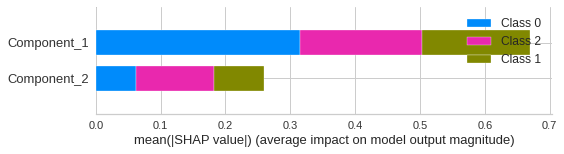

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [72]:

interpret_model(tuned_rf_pca, plot='summary')

In [73]:

interpret_model(tuned_rf_pca, plot='reason', observation=24)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=24, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [74]:

interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
